In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

In [3]:
directory="DATA/train/"
classses=os.listdir(directory)

In [4]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

DATA/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
DATA/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
DATA/train/normal
DATA/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


In [5]:
import random
random.shuffle(data1)

In [6]:
len(data1)

613

In [7]:
classses

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

In [8]:
x=[]#ndependent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [9]:
x=np.array(x)
y=np.array(y)
#x=x/255 #feature scaling

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard


In [12]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_vgg = Sequential()
model_vgg.add(base_model)
model_vgg.add(Flatten(input_shape=base_model.output_shape[1:]))
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(Dropout(0.2))
model_vgg.add(Dense(4, activation='softmax'))
model_vgg = Model(inputs=model_vgg.input, outputs=model_vgg.output)
model_vgg.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [13]:
progess = model_vgg.fit(x=X_train,y=y_train,epochs=10,validation_data= (X_test, y_test),batch_size=16)


Epoch 1/10
31/31 [==============================] - 22s 452ms/step - loss: 2.9939 - accuracy: 0.3274 - val_loss: 1.0359 - val_accuracy: 0.5528
Epoch 2/10
31/31 [==============================] - 3s 107ms/step - loss: 0.9891 - accuracy: 0.5856 - val_loss: 0.9178 - val_accuracy: 0.5610
Epoch 3/10
31/31 [==============================] - 3s 106ms/step - loss: 0.8061 - accuracy: 0.6676 - val_loss: 0.6049 - val_accuracy: 0.7642
Epoch 4/10
31/31 [==============================] - 3s 106ms/step - loss: 0.5758 - accuracy: 0.7856 - val_loss: 0.5430 - val_accuracy: 0.7805
Epoch 5/10
31/31 [==============================] - 3s 106ms/step - loss: 0.4185 - accuracy: 0.8462 - val_loss: 0.4808 - val_accuracy: 0.8374
Epoch 6/10
31/31 [==============================] - 3s 107ms/step - loss: 0.3976 - accuracy: 0.8699 - val_loss: 0.2824 - val_accuracy: 0.9187
Epoch 7/10
31/31 [==============================] - 3s 107ms/step - loss: 0.2085 - accuracy: 0.9258 - val_loss: 0.1441 - val_accuracy: 0.9756
Epoch

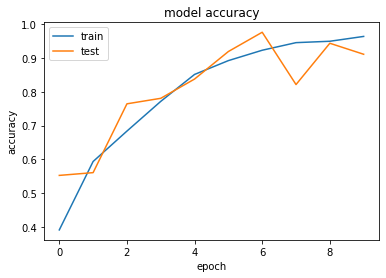

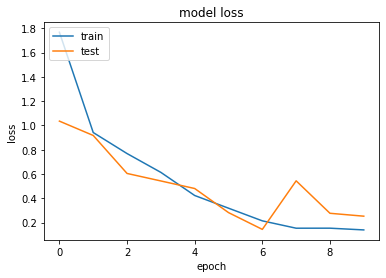

In [14]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model_vgg.predict(X_test)

In [16]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.85      0.91      0.88        32
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.93      0.90      0.92        30
                                          normal       0.96      1.00      0.98        26
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.91      0.86      0.88        35

                                        accuracy                           0.91       123
                                       macro avg       0.91      0.92      0.91       123
                                    weighted avg       0.91      0.91      0.91       123



<AxesSubplot:>

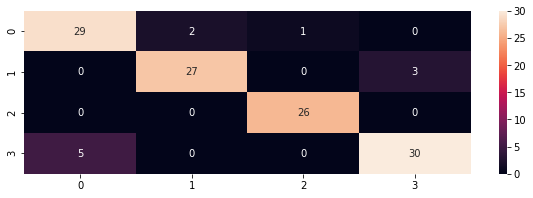

In [18]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [19]:
model_vgg.save("model_vgg.hp5")

INFO:tensorflow:Assets written to: model_vgg.hp5\assets


In [20]:
base_model = applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [22]:
progess = model.fit(x=X_train,y=y_train,epochs=10,validation_data= (X_test, y_test),batch_size=8)

Epoch 1/10
62/62 [==============================] - 24s 261ms/step - loss: 1.6262 - accuracy: 0.6204 - val_loss: 0.7433 - val_accuracy: 0.7073
Epoch 2/10
62/62 [==============================] - 5s 78ms/step - loss: 0.4106 - accuracy: 0.8571 - val_loss: 3.8213 - val_accuracy: 0.5203
Epoch 3/10
62/62 [==============================] - 5s 78ms/step - loss: 0.3684 - accuracy: 0.9041 - val_loss: 0.2702 - val_accuracy: 0.8862
Epoch 4/10
62/62 [==============================] - 5s 78ms/step - loss: 0.0889 - accuracy: 0.9673 - val_loss: 0.2331 - val_accuracy: 0.9350
Epoch 5/10
62/62 [==============================] - 5s 78ms/step - loss: 0.1343 - accuracy: 0.9694 - val_loss: 0.2310 - val_accuracy: 0.9268
Epoch 6/10
62/62 [==============================] - 5s 78ms/step - loss: 0.1190 - accuracy: 0.9755 - val_loss: 0.1885 - val_accuracy: 0.9350
Epoch 7/10
62/62 [==============================] - 5s 78ms/step - loss: 0.4170 - accuracy: 0.9122 - val_loss: 0.7255 - val_accuracy: 0.8049
Epoch 8/10


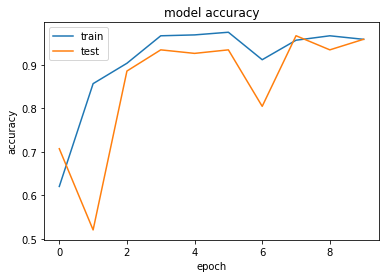

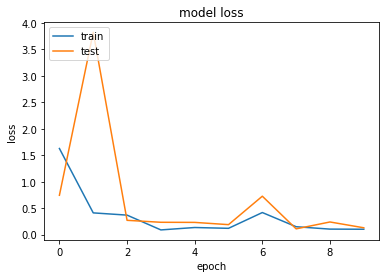

In [23]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [25]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.94      0.94      0.94        32
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       0.94      0.97      0.95        30
                                          normal       1.00      1.00      1.00        26
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       0.97      0.94      0.96        35

                                        accuracy                           0.96       123
                                       macro avg       0.96      0.96      0.96       123
                                    weighted avg       0.96      0.96      0.96       123



<AxesSubplot:>

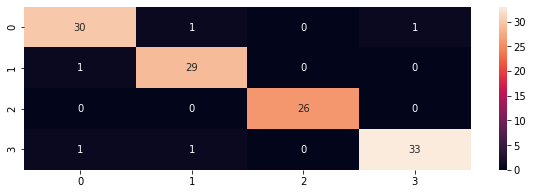

In [27]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [28]:
model.save("model_resnet.hp5")

INFO:tensorflow:Assets written to: model_resnet.hp5\assets


In [29]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [31]:
progess = model.fit(x=X_train,y=y_train,epochs=7,validation_data= (X_test, y_test),batch_size=8)

Epoch 1/7
62/62 [==============================] - 6s 93ms/step - loss: 0.3250 - accuracy: 0.8796 - val_loss: 0.5888 - val_accuracy: 0.7561
Epoch 2/7
62/62 [==============================] - 6s 92ms/step - loss: 0.1437 - accuracy: 0.9571 - val_loss: 0.6104 - val_accuracy: 0.8049
Epoch 3/7
62/62 [==============================] - 6s 95ms/step - loss: 0.2356 - accuracy: 0.9388 - val_loss: 0.5779 - val_accuracy: 0.8293
Epoch 4/7
62/62 [==============================] - 6s 93ms/step - loss: 0.2201 - accuracy: 0.9347 - val_loss: 0.2110 - val_accuracy: 0.9268
Epoch 5/7
62/62 [==============================] - 6s 96ms/step - loss: 0.0749 - accuracy: 0.9776 - val_loss: 0.3827 - val_accuracy: 0.8943
Epoch 6/7
62/62 [==============================] - 6s 99ms/step - loss: 0.1474 - accuracy: 0.9571 - val_loss: 0.5843 - val_accuracy: 0.8537
Epoch 7/7
62/62 [==============================] - 6s 95ms/step - loss: 0.0854 - accuracy: 0.9714 - val_loss: 0.1955 - val_accuracy: 0.9593


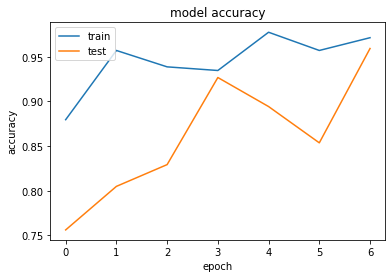

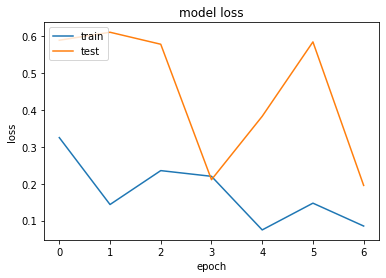

In [32]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [34]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                                                  precision    recall  f1-score   support

      adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib       0.89      0.97      0.93        32
   large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa       1.00      0.97      0.98        30
                                          normal       0.96      1.00      0.98        26
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa       1.00      0.91      0.96        35

                                        accuracy                           0.96       123
                                       macro avg       0.96      0.96      0.96       123
                                    weighted avg       0.96      0.96      0.96       123



<AxesSubplot:>

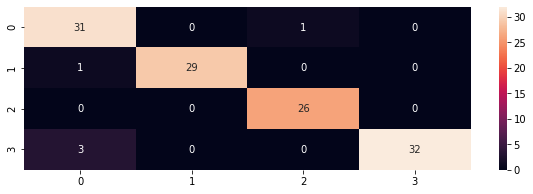

In [36]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [37]:
model.save("model_incep.hp5")

INFO:tensorflow:Assets written to: model_incep.hp5\assets
